# Recommendation Systems | Project

### 1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
!pip install turicreate
from platform import python_version
print(python_version())

     |████████████████████████████████| 86.1MB 1.3MB/s 
     |████████████████████████████████| 2.7MB 37.9MB/s 
     |████████████████████████████████| 23.8MB 1.3MB/s 
ERROR: mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.4 which is incompatible.
ERROR: mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
3.6.8


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import turicreate as turicreate

In [3]:
#ratings_df= pd.read_csv('/ratings_Electronics.csv',header= None)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ratings_df= pd.read_csv('/content/drive/My Drive/Colab Notebooks/ratings_Electronics.csv',header= None)

In [5]:
ratings_df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
ratings_df.columns = ['userId', 'productId', 'ratings','timestamp']

In [7]:
ratings_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in ratings_df.columns: # Loop through all columns in the dataframe
    if ratings_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        ratings_df[feature] = pd.Categorical(ratings_df[feature]).codes # Replace strings with an integer
print(ratings_df.shape)

(7824482, 4)


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       int32
productId    int32
ratings      float64
timestamp    int64
dtypes: float64(1), int32(2), int64(1)
memory usage: 179.1 MB


In [11]:
ratings_df.ratings.value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6804462b0>]],
      dtype=object)

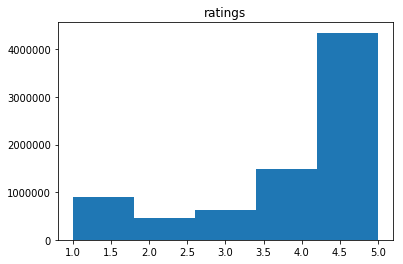

In [12]:
ratings_df.hist(column = 'ratings', bins= 5, grid=False,)
# As we can see from the histogram majority of 

### 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [0]:
user_counts = ratings_df['userId'].value_counts()
user_list = user_counts[user_counts > 50].index.tolist()
ratings_filter_df = ratings_df[ratings_df['userId'].isin(user_list)]

In [14]:
ratings_filter_df.head()

,userId,productId,ratings,timestamp
118,3986913,21,3.0,1377907200
177,2298973,36,1.0,1319673600
178,234834,36,4.0,1281744000
492,2610792,38,5.0,1373587200
631,3124240,38,5.0,1353456000


In [15]:
ratings_filter_df.drop(columns='timestamp',axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
ratings_filter_df.userId.value_counts().sort_values(ascending =False)

3263531    520
3512451    501
2989526    498
3291008    431
3284634    406
755206     380
2424036    314
1451394    311
4100926    308
3935038    296
1277963    296
1186114    292
2492518    282
2682865    282
2883459    279
1843984    277
1220074    270
3003145    266
229970     261
2560612    257
2153482    253
77779      252
1207517    252
950704     247
3613568    244
1116329    240
3541102    239
1852294    238
2534992    236
2058418    227
          ... 
84384       51
4154427     51
75142       51
2215078     51
947587      51
1037652     51
330073      51
2545231     51
2255890     51
3484456     51
2965656     51
2153387     51
1491259     51
951118      51
2997068     51
3034188     51
371609      51
2544761     51
2906392     51
270420      51
1773976     51
2107708     51
3253279     51
4098887     51
1515187     51
3451582     51
3574074     51
2906650     51
3508439     51
1655296     51
Name: userId, Length: 1466, dtype: int64

In [17]:
ratings_filter_df.info()
# From (7824482, 4), we have trimmed the data down to (122171, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 118 to 7824444
Data columns (total 3 columns):
userId       122171 non-null int32
productId    122171 non-null int32
ratings      122171 non-null float64
dtypes: float64(1), int32(2)
memory usage: 2.8 MB


In [0]:
#Now, let's see the distribution of ratings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64dab3f28>]],
      dtype=object)

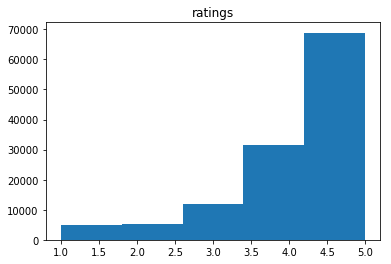

In [19]:
ratings_filter_df.hist(column = 'ratings', bins= 5, grid=False,)

### 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [0]:

train_data, test_data = train_test_split(ratings_filter_df, test_size = .3, random_state=123)

In [21]:
ratings_filter_df.shape

(122171, 3)

### 4.Build Popularity Recommender model.

In [0]:
#convert the dataset in SFrames as expected by turicreate
train_data = turicreate.SFrame(train_data)
test_data = turicreate.SFrame(test_data)

In [23]:
#creating the popularity model
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='userId', item_id='productId', target='ratings', random_seed=0)

Preparing data set.

Data has 85519 observations with 1466 users and 37423 items.

Data prepared in: 0.121497s

85519 observations to process; with 37423 unique items.

In [24]:
#recommending for new users
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+--------+-----------+-------+------+
| userId | productId | score | rank |
+--------+-----------+-------+------+
|   1    |   401699  |  5.0  |  1   |
|   1    |   361788  |  5.0  |  2   |
|   1    |   401202  |  5.0  |  3   |
|   1    |   352610  |  5.0  |  4   |
|   1    |   100651  |  5.0  |  5   |
|   2    |   401699  |  5.0  |  1   |
|   2    |   361788  |  5.0  |  2   |
|   2    |   401202  |  5.0  |  3   |
|   2    |   352610  |  5.0  |  4   |
|   2    |   100651  |  5.0  |  5   |
|   3    |   401699  |  5.0  |  1   |
|   3    |   361788  |  5.0  |  2   |
|   3    |   401202  |  5.0  |  3   |
|   3    |   352610  |  5.0  |  4   |
|   3    |   100651  |  5.0  |  5   |
|   4    |   401699  |  5.0  |  1   |
|   4    |   361788  |  5.0  |  2   |
|   4    |   401202  |  5.0  |  3   |
|   4    |   352610  |  5.0  |  4   |
|   4    |   100651  |  5.0  |  5   |
|   5    |   401699  |  5.0  |  1   |
|   5    |   361788  |  5.0  |  2   |
|   5    |   401202  |  5.0  |  3   |
|   5    |  

In [0]:
#The recommendations for all users are the same – 401699, 361788, 401202, 352610, 100651. 
#And they’re all in the same order! This confirms that all the recommended movies have an average rating of 5, 
#i.e. all the users who watched the movie gave it a top rating. Thus our popularity system works as expected.

In [26]:
popularity_model.evaluate_rmse(test_data, target='ratings')

{'rmse_by_item': Columns:
 	productId	int
 	rmse	float
 	count	int
 
 Rows: 20872
 
 Data:
 +-----------+---------------------+-------+
 | productId |         rmse        | count |
 +-----------+---------------------+-------+
 |   30459   |  0.816496580927726  |   3   |
 |   316228  |  1.2620002572527742 |   1   |
 |   154577  |  2.262000257252774  |   1   |
 |   374668  |  1.2961481396815722 |   5   |
 |   186667  | 0.48713836410227446 |   3   |
 |   434460  |  0.7730823048033114 |   8   |
 |   291756  |         0.5         |   1   |
 |   448800  |  1.2620002572527742 |   1   |
 |   219673  |  0.2620002572527742 |   1   |
 |   248916  |         0.75        |   3   |
 +-----------+---------------------+-------+
 [20872 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_user': Columns:
 	userId	int
 	rmse	float
 	count	int
 
 Rows: 1466
 
 Data:
 +---------+--------------------+--

### 5. Build Collaborative Filtering model.

In [27]:
#Training the model
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='userId', item_id='productId', target='ratings', similarity_type='cosine')

Preparing data set.

Data has 85519 observations with 1466 users and 37423 items.

Data prepared in: 0.112754s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.615ms                        | 68         |

| 13.135ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 4.85s                               | 0                | 13              |

| 20.95s                              | 100              | 37423           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 22.0255s

In [28]:
modelFactorization = turicreate.recommender.ranking_factorization_recommender.create(train_data,
                                          user_id='userId',
                                    item_id='productId',
                                    target='ratings')
results = modelFactorization.recommend(k=5)

Preparing data set.

Data has 85519 observations with 1466 users and 37423 items.

Data prepared in: 0.114636s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10689 / 85519 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | 1.05349                                  |

| 4       | 0.195312          | 1.13997                                  |

| 5       | 0.0976562         | 1.29509                                  |

| 6       | 0.0488281         | 1.47197                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.390625          | 1.05349                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 142us        | 2.19842           | 1.05889               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 172.77ms     | DIVERGED          | DIVERGED              | 0.390625    |

| RESET   | 296.257ms    | 2.19843           | 1.05889               |             |

| 1       | 413.536ms    | 2.45441           | 1.22735               | 0.195312    |

| 2       | 518.122ms    | 2.08521           | 1.08098               | 0.116134    |

| 3       | 631.068ms    | 1.8047            | 0.970982              | 0.0856819   |

| 4       | 741.647ms    | 1.47862           | 0.820642              | 0.0580668   |

| 5       | 848.78ms     | 1.23452           | 0.69738               | 0.0491185   |

| 9       | 1.26s        | 0.690708          | 0.422302              | 0.0316075   |

| 25      | 2.81s        | 0.187829          | 0.163701              | 0.0146899   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.172311

Final training RMSE: 0.127969

recommendations finished on 1000/1466 queries. users per second: 1688.39

### 6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.


In [29]:
turicreate.recommender.util.compare_models(test_data, [popularity_model, item_sim_model],model_names=['Popularity Model', 'Collaborative-Item Similarity Model'])


PROGRESS: Evaluate model Popularity Model


recommendations finished on 1000/1466 queries. users per second: 2144.86


Precision and recall summary statistics by cutoff
+--------+-----------------------+------------------------+
| cutoff |     mean_precision    |      mean_recall       |
+--------+-----------------------+------------------------+
|   1    |          0.0          |          0.0           |
|   2    |          0.0          |          0.0           |
|   3    |          0.0          |          0.0           |
|   4    |          0.0          |          0.0           |
|   5    |          0.0          |          0.0           |
|   6    |          0.0          |          0.0           |
|   7    |          0.0          |          0.0           |
|   8    |  8.52660300136427e-05 | 3.5901486321533724e-05 |
|   9    | 7.579202667879339e-05 | 3.5901486321533724e-05 |
|   10   | 6.821282401091419e-05 | 3.5901486321533724e-05 |
+--------+-----------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 1.1061563970422748

Per User RMSE (best)
+--------+--------------------

recommendations finished on 1000/1466 queries. users per second: 2205.14


Precision and recall summary statistics by cutoff
+--------+-----------------------+-----------------------+
| cutoff |     mean_precision    |      mean_recall      |
+--------+-----------------------+-----------------------+
|   1    |  0.01091405184174626  | 0.0004843855975712753 |
|   2    |  0.008867667121418824 | 0.0007355697409345018 |
|   3    |  0.007276034561164167 | 0.0008929252301992315 |
|   4    | 0.0071623465211459745 | 0.0011113001802709728 |
|   5    | 0.0064120054570259155 | 0.0012429953093256055 |
|   6    |  0.006366530241018648 | 0.0015158142463445898 |
|   7    |  0.005651919703761451 | 0.0015754288152280778 |
|   8    |  0.005883356070941338 | 0.0018394449965377932 |
|   9    |  0.005760194027588293 | 0.0020069015341539877 |
|   10   | 0.0054570259208731355 | 0.0021412759707004777 |
+--------+-----------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 4.39028681776448

Per User RMSE (best)
+--------+------+-------+
| userId | rmse | co

[{'precision_recall_by_user': Columns:
  	userId	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 26388
  
  Data:
  +---------+--------+-----------+--------+-------+
  |  userId | cutoff | precision | recall | count |
  +---------+--------+-----------+--------+-------+
  | 1516223 |   1    |    0.0    |  0.0   |   33  |
  | 1516223 |   2    |    0.0    |  0.0   |   33  |
  | 1516223 |   3    |    0.0    |  0.0   |   33  |
  | 1516223 |   4    |    0.0    |  0.0   |   33  |
  | 1516223 |   5    |    0.0    |  0.0   |   33  |
  | 1516223 |   6    |    0.0    |  0.0   |   33  |
  | 1516223 |   7    |    0.0    |  0.0   |   33  |
  | 1516223 |   8    |    0.0    |  0.0   |   33  |
  | 1516223 |   9    |    0.0    |  0.0   |   33  |
  | 1516223 |   10   |    0.0    |  0.0   |   33  |
  +---------+--------+-----------+--------+-------+
  [26388 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to

In [30]:
modelFactorization.evaluate_rmse(test_data,target='ratings')
## RMSE = 2.404280864258169

{'rmse_by_item': Columns:
 	productId	int
 	rmse	float
 	count	int
 
 Rows: 20872
 
 Data:
 +-----------+---------------------+-------+
 | productId |         rmse        | count |
 +-----------+---------------------+-------+
 |   30459   |  2.546146151132721  |   3   |
 |   316228  |  0.7001904900082687 |   1   |
 |   154577  | 0.38549382042971647 |   1   |
 |   374668  |  2.3960295055510246 |   5   |
 |   186667  |  0.6119621904469573 |   3   |
 |   434460  |  1.9004481260004529 |   8   |
 |   291756  |  3.5452542285331825 |   1   |
 |   448800  |  1.2222686464795212 |   1   |
 |   219673  |  1.7904947454938034 |   1   |
 |   248916  |  2.3855673486026716 |   3   |
 +-----------+---------------------+-------+
 [20872 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_user': Columns:
 	userId	int
 	rmse	float
 	count	int
 
 Rows: 1466
 
 Data:
 +---------+--------------------+--

### 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [31]:
#Making recommendations for users in test data
item_sim_recomm = item_sim_model.recommend(users=test_data['userId'],k=5)
item_sim_recomm.print_rows(num_rows=25)

recommendations finished on 1000/36652 queries. users per second: 2208.01

recommendations finished on 2000/36652 queries. users per second: 2300.68

recommendations finished on 3000/36652 queries. users per second: 2328.65

recommendations finished on 4000/36652 queries. users per second: 2345.68

recommendations finished on 5000/36652 queries. users per second: 2357.62

recommendations finished on 6000/36652 queries. users per second: 2369.85

recommendations finished on 7000/36652 queries. users per second: 2366.76

recommendations finished on 8000/36652 queries. users per second: 2369.77

recommendations finished on 9000/36652 queries. users per second: 2371.25

recommendations finished on 10000/36652 queries. users per second: 2372.34

recommendations finished on 11000/36652 queries. users per second: 2375.06

recommendations finished on 12000/36652 queries. users per second: 2376.83

recommendations finished on 13000/36652 queries. users per second: 2377.69

recommendations finished on 14000/36652 queries. users per second: 2380.66

recommendations finished on 15000/36652 queries. users per second: 2380.68

recommendations finished on 16000/36652 queries. users per second: 2382.1

recommendations finished on 17000/36652 queries. users per second: 2383.3

recommendations finished on 18000/36652 queries. users per second: 2384.04

recommendations finished on 19000/36652 queries. users per second: 2385.58

recommendations finished on 20000/36652 queries. users per second: 2386.39

recommendations finished on 21000/36652 queries. users per second: 2387.24

recommendations finished on 22000/36652 queries. users per second: 2387.14

recommendations finished on 23000/36652 queries. users per second: 2387.97

recommendations finished on 24000/36652 queries. users per second: 2387.64

recommendations finished on 25000/36652 queries. users per second: 2389.14

recommendations finished on 26000/36652 queries. users per second: 2385.07

recommendations finished on 27000/36652 queries. users per second: 2386.25

recommendations finished on 28000/36652 queries. users per second: 2386.73

recommendations finished on 29000/36652 queries. users per second: 2386.5

recommendations finished on 30000/36652 queries. users per second: 2387.64

recommendations finished on 31000/36652 queries. users per second: 2388.43

recommendations finished on 32000/36652 queries. users per second: 2389.34

recommendations finished on 33000/36652 queries. users per second: 2388.4

recommendations finished on 34000/36652 queries. users per second: 2389.92

recommendations finished on 35000/36652 queries. users per second: 2389.51

recommendations finished on 36000/36652 queries. users per second: 2390.43

+---------+-----------+---------------------+------+
|  userId | productId |        score        | rank |
+---------+-----------+---------------------+------+
| 4010661 |    8662   | 0.06510125224788983 |  1   |
| 4010661 |   16549   | 0.06510125224788983 |  2   |
| 4010661 |   18924   | 0.05942097927133242 |  3   |
| 4010661 |   265389  | 0.05942097927133242 |  4   |
| 4010661 |   13387   | 0.05942097927133242 |  5   |
| 2396828 |   105171  | 0.16312253636282845 |  1   |
| 2396828 |   194713  | 0.16312253636282845 |  2   |
| 2396828 |   156514  | 0.16312253636282845 |  3   |
| 2396828 |   129768  | 0.16312253636282845 |  4   |
| 2396828 |   99691   | 0.16312253636282845 |  5   |
| 1171266 |   176830  | 0.06006683294589703 |  1   |
| 1171266 |   43629   | 0.06006683294589703 |  2   |
| 1171266 |    9393   | 0.06006683294589703 |  3   |
| 1171266 |   355448  | 0.06006683294589703 |  4   |
| 1171266 |   39187   | 0.06006683294589703 |  5   |
| 3849268 |   366535  | 0.11353103816509247 | 

In [32]:
results.print_rows(num_rows=25) #On the basis of Factorization based recommendation which takes into account the latent factors as well

+---------+-----------+--------------------+------+
|  userId | productId |       score        | rank |
+---------+-----------+--------------------+------+
| 1516223 |   442162  | 6.830225164174165  |  1   |
| 1516223 |   75940   | 6.638492280720796  |  2   |
| 1516223 |   308474  | 6.510527784108247  |  3   |
| 1516223 |   80597   | 6.185924703358736  |  4   |
| 1516223 |   332275  | 5.986607248066988  |  5   |
| 1842446 |   161069  | 6.249598438023653  |  1   |
| 1842446 |   20140   | 5.9746650998583695 |  2   |
| 1842446 |   274153  | 5.901787692784395  |  3   |
| 1842446 |   188012  | 5.757479602574434  |  4   |
| 1842446 |   332275  | 5.744718009709444  |  5   |
|  392311 |   186075  | 6.4703376834383866 |  1   |
|  392311 |   201068  | 5.899995857953157  |  2   |
|  392311 |   17379   | 5.861920649289217  |  3   |
|  392311 |   303608  | 5.6421773974886795 |  4   |
|  392311 |   415424  | 5.626698548077669  |  5   |
|  810161 |   205491  | 5.661533648251619  |  1   |
|  810161 | 

### 8. Summarise your insights.

#### *As we can see above, 5 unique products are suggested for each user with collaborative filtering model ,i.e., personalized product for each user. Whereas,with popularity based model we were getting same output for each user, i.e., data is good for a cold start(when there is no data available for user). The RMSE for Factorization Recommender is far better than Item-Item based collabaorative filtering model. The interpretability is missing from factorization method.*